In [ ]:
import tensorflow as tf

**Extracting the data from the zip file**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("Sunglasses_Specs.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls Sunglasses_Specs/Test_Images/

Eyeglasses  Sunglasses


In [ ]:
!ls Sunglasses_Specs/Train_Images/

Eyeglasses  Sunglasses


In [ ]:
# these are the training images for eyeglasses
!ls Sunglasses_Specs/Train_Images/Eyeglasses

 00CVQQ2KPPG9.jpg   face-164.jpg	  PSW1Q4N3T9TG.jpg
 04GJT6KMKC18.jpg   face-165.jpg	  Q10L942O75CW.jpg
 0B0JPVMW5YUI.jpg   face-166.jpg	  QBVMV7VF4ULO.jpg
 0BRJ7XSKXNLR.jpg   face-173.jpg	  QHSBPN51X76O.jpg
 0EK1PU63ASMR.jpg   face-176.jpg	  QNHOQ634TNIS.jpg
 0FX5C7D0N89F.jpg   face-179.jpg	  QTDCXFTN1HB3.jpg
 0FZBWHLIP655.jpg   face-180.jpg	  QUZGC8YX5QXA.jpg
 0HGVMP4471HB.jpg   face-183.jpg	  QVZNYSW3JIVO.jpg
 0ID96H2ICG0H.jpg   face-184.jpg	  QWUIY16ZQAKO.jpg
 0IE32QZ98HB0.jpg   face-185.jpg	  R08H03KXX6EJ.jpg
 0JLC5E2ZAFZ6.jpg   face-186.jpg	  R2JV9F4SXX0E.jpg
 0KPU08TJBJZG.jpg   face-187.jpg	  R5WTUGDFTCUU.jpg
 0KXEAXKZ0RRD.jpg   face-188.jpg	  R669RF4BDTT4.jpg
 0NOQ0WO4NX1B.jpg   face-190.jpg	  R6SJK8BN2PVW.jpg
 0PD2WYBKBYL2.jpg   face-19.jpg		  RDXJ3SLSFQGQ.jpg
 0PYWQY1XV9Q1.jpg   face-229.jpg	  RHRIB9QFSBVB.jpg
 0S7NS61UGWZR.jpg   face-232.jpg	  RLL7BZYRQ57Z.jpg
 0WPW5B3T6S4G.jpg   face-234.jpg	  RLQN6XIO2XFR.jpg
 11EUZHN1FTTF.jpg   face-235.jpg	  RY5GY8TZK2AW.jpg
 11QEWRGG95K

In [ ]:
# finding out the number of images in the folders respectively
import os
number_eyeglasses_train = len(os.listdir("Sunglasses_Specs/Train_Images/Eyeglasses"))
number_eyeglasses_test = len(os.listdir("Sunglasses_Specs/Test_Images/Eyeglasses"))
number_sunglasses_train = len(os.listdir("Sunglasses_Specs/Train_Images/Sunglasses"))
number_sunglasses_test = len(os.listdir("Sunglasses_Specs/Test_Images/Sunglasses"))

print("Below are the number of training and testing images for the Eyeglasses and Sunglasses respectively ")

print(f'Number of training images for Eyeglasses :{number_eyeglasses_train}')
print(f'Number of testing images for Eyeglasses :{number_eyeglasses_test}')
print(f'Number of training images for Sunglasses :{number_sunglasses_train}')
print(f'Number of testing images for Sunglasses :{number_sunglasses_test}')

Below are the number of training and testing images for the Eyeglasses and Sunglasses respectively 
Number of training images for Eyeglasses :646
Number of testing images for Eyeglasses :198
Number of training images for Sunglasses :790
Number of testing images for Sunglasses :382


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (64, 64, 3)


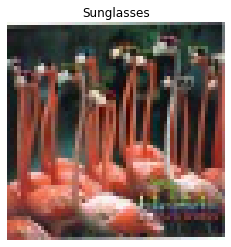

In [ ]:
# getting a random image from the training data of the Sunglasses

img = view_random_image(target_dir="Sunglasses_Specs/Train_Images/",
                        target_class="Sunglasses")

Image shape: (134, 94, 3)


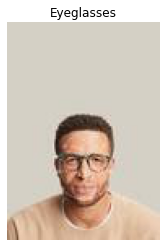

In [ ]:
# getting a random image from the training data of the Eyeglasses

img = view_random_image(target_dir="Sunglasses_Specs/Train_Images/",
                        target_class="Eyeglasses")

In [ ]:
# these are the pixels of the images
img

array([[[212, 208, 197],
        [212, 208, 197],
        [212, 208, 197],
        ...,
        [212, 208, 197],
        [212, 208, 197],
        [212, 208, 197]],

       [[212, 208, 197],
        [212, 208, 197],
        [212, 208, 197],
        ...,
        [212, 208, 197],
        [212, 208, 197],
        [212, 208, 197]],

       [[212, 208, 197],
        [212, 208, 197],
        [212, 208, 197],
        ...,
        [212, 208, 197],
        [212, 208, 197],
        [212, 208, 197]],

       ...,

       [[158, 124,  96],
        [182, 148, 120],
        [205, 171, 143],
        ...,
        [228, 198, 172],
        [232, 202, 176],
        [232, 202, 176]],

       [[161, 127,  99],
        [177, 143, 115],
        [207, 173, 145],
        ...,
        [228, 198, 172],
        [234, 204, 178],
        [232, 202, 176]],

       [[167, 133, 105],
        [174, 140, 112],
        [204, 170, 142],
        ...,
        [227, 197, 171],
        [234, 204, 178],
        [231, 201, 175]]

In [ ]:
img/255

array([[[0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        ...,
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902]],

       [[0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        ...,
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902]],

       [[0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        ...,
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902],
        [0.83137255, 0.81568627, 0.77254902]],

       ...,

       [[0.61960784, 0.48627451, 0.37647059],
        [0.71372549, 0.58039216, 0.47058824],
        [0.80392157, 0

In [ ]:
# First we will use the dataset that hasn't undergone data augmentation

# Let us define the training and testing paths for the model

train_dir='Sunglasses_Specs/Train_Images/'
test_dir='Sunglasses_Specs/Test_Images/'

In [ ]:
# Now we will have to rescale the data and then turn it into batches

from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data_generator=ImageDataGenerator(rescale=1/255.)
testing_data_generator=ImageDataGenerator(rescale=1/255.)

# Turning the images into batches
train_data = training_data_generator.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = testing_data_generator.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1436 images belonging to 2 classes.
Found 580 images belonging to 2 classes.


In [ ]:
print(f'Total images in training class: {number_eyeglasses_train+number_sunglasses_train}')
print(f'Total images in testing class: {number_eyeglasses_test+number_sunglasses_test}')

Total images in training class: 1436
Total images in testing class: 580


In [ ]:
# Start preparing our model

# Importing necessary libraries

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keSearch modes
All
BooksVideosImagesNewsMore
Tools
Aboutras.layers import Conv2D,Dense,Flatten,Activation,MaxPool2D

In [ ]:
# creating tensorboard callback function

import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
# the first model

model_1 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [ ]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
35/45 [======================>.......] - ETA: 25s - loss: 1.1242 - accuracy: 0.6738

KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# creating model 2

model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# compiling the model

model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# fitting the model

history_2=model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
45/45 [==============================] - 5s 78ms/step - loss: 0.5600 - accuracy: 0.7013 - val_loss: 0.3162 - val_accuracy: 0.9017
Epoch 2/10
45/45 [==============================] - 4s 81ms/step - loss: 0.3871 - accuracy: 0.8329 - val_loss: 0.2704 - val_accuracy: 0.9034
Epoch 3/10
45/45 [==============================] - 3s 68ms/step - loss: 0.3436 - accuracy: 0.8649 - val_loss: 0.2649 - val_accuracy: 0.9190
Epoch 4/10
45/45 [==============================] - 3s 70ms/step - loss: 0.3229 - accuracy: 0.8774 - val_loss: 0.2539 - val_accuracy: 0.9138
Epoch 5/10
45/45 [==============================] - 4s 82ms/step - loss: 0.2806 - accuracy: 0.8858 - val_loss: 0.2570 - val_accuracy: 0.8914
Epoch 6/10
45/45 [==============================] - 3s 68ms/step - loss: 0.2365 - accuracy: 0.9081 - val_loss: 0.2410 - val_accuracy: 0.8966
Epoch 7/10
45/45 [==============================] - 3s 72ms/step - loss: 0.2185 - accuracy: 0.9143 - val_loss: 0.2336 - val_accuracy: 0.9000
Epoch 8/10
45

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# creating model 3

# using activation function tanh

from tensorflow.keras.optimizers import SGD

model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="tanh",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="tanh"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="tanh"),
  tf.keras.layers.Conv2D(10, 3, activation="tanh"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# compiling the model

model_3.compile(loss='binary_crossentropy',
                optimizer=SGD(),
                metrics=['accuracy'])

# fitting the model

history_3=model_3.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
45/45 [==============================] - 5s 80ms/step - loss: 0.6305 - accuracy: 0.6831 - val_loss: 0.4349 - val_accuracy: 0.8259
Epoch 2/10
45/45 [==============================] - 4s 81ms/step - loss: 0.4474 - accuracy: 0.8022 - val_loss: 0.4851 - val_accuracy: 0.7914
Epoch 3/10
45/45 [==============================] - 3s 70ms/step - loss: 0.3840 - accuracy: 0.8475 - val_loss: 0.3001 - val_accuracy: 0.8828
Epoch 4/10
45/45 [==============================] - 3s 71ms/step - loss: 0.3519 - accuracy: 0.8628 - val_loss: 0.2944 - val_accuracy: 0.8845
Epoch 5/10
45/45 [==============================] - 4s 81ms/step - loss: 0.3475 - accuracy: 0.8649 - val_loss: 0.2739 - val_accuracy: 0.8810
Epoch 6/10
45/45 [==============================] - 3s 71ms/step - loss: 0.3259 - accuracy: 0.8851 - val_loss: 0.2973 - val_accuracy: 0.8810
Epoch 7/10
45/45 [==============================] - 3s 70ms/step - loss: 0.3121 - accuracy: 0.8851 - val_loss: 0.2730 - val_accuracy: 0.8948
Epoch 8/10
45

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# creating model 4

# using activation function tanh and optimizer is Adagrad


from tensorflow.keras.optimizers import Adagrad

model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="tanh",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="tanh"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="tanh"),
  tf.keras.layers.Conv2D(10, 3, activation="tanh"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# compiling the model

model_4.compile(loss='binary_crossentropy',
                optimizer=Adagrad(),
                metrics=['accuracy'])

# fitting the model

history_4=model_4.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
45/45 [==============================] - 5s 87ms/step - loss: 0.6881 - accuracy: 0.5383 - val_loss: 0.6241 - val_accuracy: 0.8448
Epoch 2/10
45/45 [==============================] - 3s 68ms/step - loss: 0.5906 - accuracy: 0.7131 - val_loss: 0.4828 - val_accuracy: 0.8448
Epoch 3/10
45/45 [==============================] - 3s 69ms/step - loss: 0.4871 - accuracy: 0.7848 - val_loss: 0.3402 - val_accuracy: 0.8914
Epoch 4/10
45/45 [==============================] - 4s 83ms/step - loss: 0.4566 - accuracy: 0.7932 - val_loss: 0.3056 - val_accuracy: 0.9017
Epoch 5/10
45/45 [==============================] - 3s 72ms/step - loss: 0.4405 - accuracy: 0.8001 - val_loss: 0.3721 - val_accuracy: 0.8759
Epoch 6/10
45/45 [==============================] - 3s 72ms/step - loss: 0.4232 - accuracy: 0.8196 - val_loss: 0.3062 - val_accuracy: 0.8845
Epoch 7/10
45/45 [==============================] - 3s 73ms/step - loss: 0.4052 - accuracy: 0.8294 - val_loss: 0.3198 - val_accuracy: 0.8845
Epoch 8/10
45

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# creating model 5

# decreasing the number of filter size and increasing the number of features extracted

model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=20,
                         kernel_size=2,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),
  tf.keras.layers.Conv2D(20, 2, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(20, 2, activation="relu"),
  tf.keras.layers.Conv2D(20, 2, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# compiling the model

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# fitting the model

history_5=model_5.fit(train_data,
            epochs=15,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/15
45/45 [==============================] - 6s 73ms/step - loss: 0.5518 - accuracy: 0.7312 - val_loss: 0.3597 - val_accuracy: 0.8517
Epoch 2/15
45/45 [==============================] - 3s 65ms/step - loss: 0.4010 - accuracy: 0.8245 - val_loss: 0.2958 - val_accuracy: 0.8948
Epoch 3/15
45/45 [==============================] - 3s 70ms/step - loss: 0.3590 - accuracy: 0.8545 - val_loss: 0.2396 - val_accuracy: 0.8897
Epoch 4/15
45/45 [==============================] - 3s 74ms/step - loss: 0.3280 - accuracy: 0.8649 - val_loss: 0.2586 - val_accuracy: 0.9017
Epoch 5/15
45/45 [==============================] - 3s 69ms/step - loss: 0.3106 - accuracy: 0.8795 - val_loss: 0.2519 - val_accuracy: 0.8931
Epoch 6/15
45/45 [==============================] - 3s 68ms/step - loss: 0.2636 - accuracy: 0.8990 - val_loss: 0.2919 - val_accuracy: 0.8741
Epoch 7/15
45/45 [==============================] - 3s 77ms/step - loss: 0.2276 - accuracy: 0.9102 - val_loss: 0.4358 - val_accuracy: 0.8259
Epoch 8/15
45

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 223, 223, 20)      260       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 20)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 110, 110, 20)      1620      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 20)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 54, 54, 20)        1620      
                                                                 
 conv2d_18 (Conv2D)          (None, 53, 53, 20)       

In [ ]:
# Set random seed
tf.random.set_seed(42)

# creating model 6
# gives low accuracy as only dense layers are added to the network

model_6 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model

model_6.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model

history_6 = model_6.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
45/45 [==============================] - 5s 76ms/step - loss: 7.9453 - accuracy: 0.5251 - val_loss: 0.4492 - val_accuracy: 0.8069
Epoch 2/15
45/45 [==============================] - 3s 62ms/step - loss: 1.1740 - accuracy: 0.5877 - val_loss: 1.0522 - val_accuracy: 0.6414
Epoch 3/15
45/45 [==============================] - 3s 62ms/step - loss: 1.2930 - accuracy: 0.5850 - val_loss: 1.0329 - val_accuracy: 0.6397
Epoch 4/15
45/45 [==============================] - 3s 60ms/step - loss: 0.6340 - accuracy: 0.7228 - val_loss: 0.5060 - val_accuracy: 0.7500
Epoch 5/15
45/45 [==============================] - 3s 71ms/step - loss: 0.4890 - accuracy: 0.7653 - val_loss: 0.5376 - val_accuracy: 0.7466
Epoch 6/15
45/45 [==============================] - 3s 65ms/step - loss: 0.5891 - accuracy: 0.7326 - val_loss: 0.4066 - val_accuracy: 0.8172
Epoch 7/15
45/45 [==============================] - 3s 63ms/step - loss: 0.4991 - accuracy: 0.7890 - val_loss: 0.6007 - val_accuracy: 0.7103
Epoch 8/15
45

**Data Augmentation**

**Improving data accuracy with the help of data augmentation**

In [ ]:
# now we will augment the data

image_augmentation = ImageDataGenerator(
    rescale=1/255.,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
train_data_augmented=image_augmentation.flow_from_directory(train_dir,
                                                            target_size=(224,224),
                                                            batch_size=32,
                                                            class_mode='binary')

test_data_augmented=image_augmentation.flow_from_directory(test_dir,
                                                           target_size=(224,224),
                                                           batch_size=32,
                                                           class_mode='binary')

Found 1436 images belonging to 2 classes.
Found 580 images belonging to 2 classes.


In [ ]:
# now working on the images that are augmented .

# working on model 5

model_7 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=20,
                         kernel_size=2,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),
  tf.keras.layers.Conv2D(20, 2, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(20, 2, activation="relu"),
  tf.keras.layers.Conv2D(20, 2, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# compiling the model

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])



# fitting the model

history_7=model_7.fit(train_data_augmented,
            epochs=15,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data_augmented,
            validation_steps=len(test_data))

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/15
45/45 [==============================] - 23s 470ms/step - loss: 0.5821 - accuracy: 0.6985 - val_loss: 0.3381 - val_accuracy: 0.9052
Epoch 2/15
45/45 [==============================] - 21s 475ms/step - loss: 0.4706 - accuracy: 0.7841 - val_loss: 0.3748 - val_accuracy: 0.8655
Epoch 3/15
45/45 [==============================] - 21s 478ms/step - loss: 0.4333 - accuracy: 0.7953 - val_loss: 0.3085 - val_accuracy: 0.8948
Epoch 4/15
45/45 [==============================] - 22s 481ms/step - loss: 0.4066 - accuracy: 0.8196 - val_loss: 0.3020 - val_accuracy: 0.8879
Epoch 5/15
45/45 [==============================] - 21s 476ms/step - loss: 0.3980 - accuracy: 0.8322 - val_loss: 0.2674 - val_accuracy: 0.9034
Epoch 6/15
45/45 [==============================] - 21s 479ms/step - loss: 0.3967 - accuracy: 0.8343 - val_loss: 0.3913 - val_accuracy: 0.8259
Epoch 7/15
45/45 [==============================] - 21s 478ms/step - loss: 0.3754 - accuracy: 0.8370 - val_loss: 0.3175 - val_accuracy: 0.8810

**Prediction of the data**

In [ ]:
# for prediction on the unseen data, the data should be in the same form as our model is trained. For this we create
# a function that will help us to do the task

def prepare_image(image_filename,image_shape=224):
  img=tf.io.read_file(image_filename)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img,size=[image_shape,image_shape])
  img=img/255.
  return img

In [ ]:
# class names in the dataset

import pathlib
import numpy as np
data_dir = pathlib.Path("Sunglasses_Specs/Train_Images/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Eyeglasses' 'Sunglasses']


In [ ]:
# creating a function in order to predict the class of the image

def predict(model,filename,class_names):
  img=prepare_image(filename)
  predict=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(predict)[0][0])]
  plt.imshow(img)
  plt.title(f'Predicted class is :{pred_class}')
  plt.axis(False)

**Trying predictions on some unknown data**

1/1 [==============================] - 0s 20ms/step


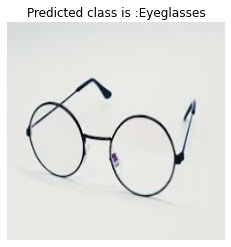

In [ ]:
predict(model_5,'/content/s1.jpeg',class_names)

1/1 [==============================] - 0s 21ms/step


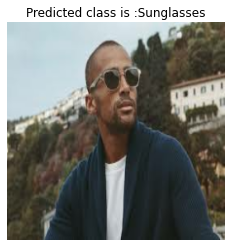

In [ ]:
predict(model_7,'/content/sg2.jpeg',class_names)

1/1 [==============================] - 0s 21ms/step


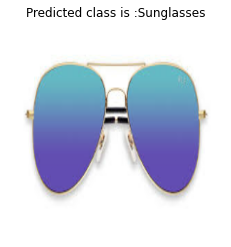

In [ ]:
predict(model_7,'/content/sg3.jpeg',class_names)

1/1 [==============================] - 0s 19ms/step


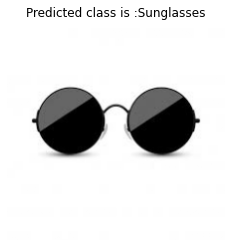

In [ ]:
predict(model_5,'/content/sg5.jpeg',class_names)

1/1 [==============================] - 0s 20ms/step


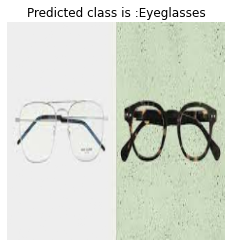

In [ ]:
predict(model_5,'/content/s10.jpeg',class_names)

1/1 [==============================] - 0s 18ms/step


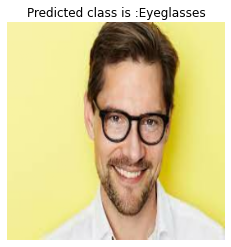

In [ ]:
predict(model_5,'/content/s91.jpeg',class_names)

1/1 [==============================] - 0s 22ms/step


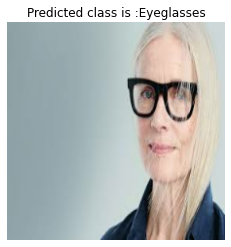

In [ ]:
predict(model_5,'/content/s37.jpeg',class_names)

**Creating the loss curves for the models**

In [ ]:
# Creating a function which will plot the curves

def plot_curves(model_history):
  loss=model_history.history['loss']
  validation_loss=model_history.history['val_loss']
  accuracy=model_history.history['accuracy']
  val_accuracy=model_history.history['val_accuracy']
  epochs=range(len(model_history.history['accuracy']))

  # Plotting the curves
  # Plotting figure for measuring the loss with the epochs

  plt.title('Graph for measuring loss with increasing epochs')
  plt.plot(epochs,loss,c='orange',label='training loss')
  plt.plot(epochs,validation_loss,c='blue',label='validation loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plotting another figure for measuring accuracy with the epochs
  plt.figure()
  plt.title('Graph for measuring accuracy with increasing epochs')
  plt.plot(epochs,accuracy,c='orange',label='training accuracy')
  plt.plot(epochs,val_accuracy,c='blue',label='validation accuracy')
  plt.xlabel('Epochs')
  plt.legend()

**Some loss curves for the model**

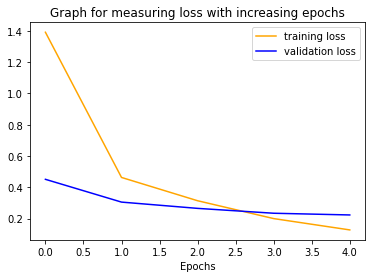

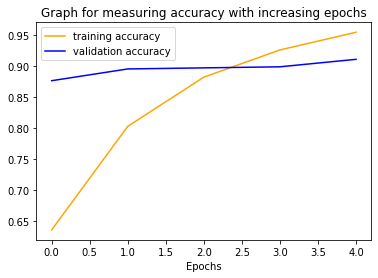

In [ ]:
plot_curves(history_1)

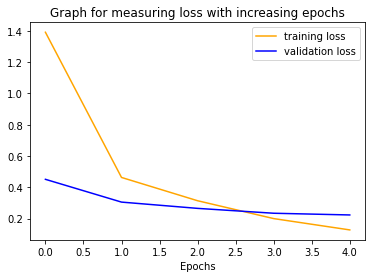

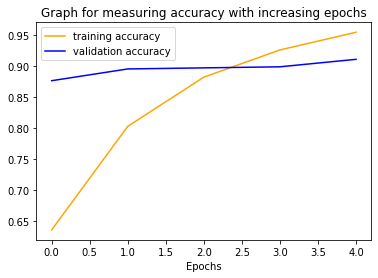

In [ ]:
plot_curves(history_1)

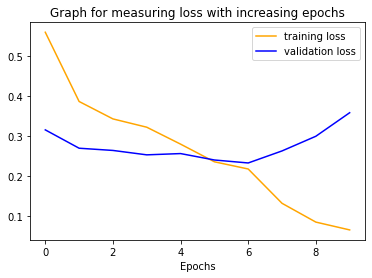

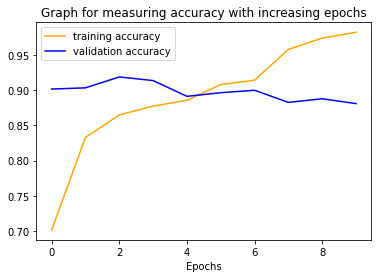

In [ ]:
plot_curves(history_2)

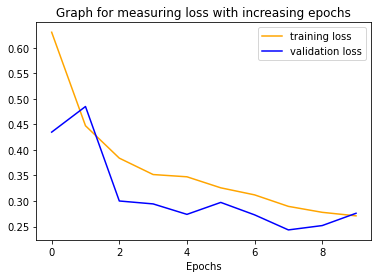

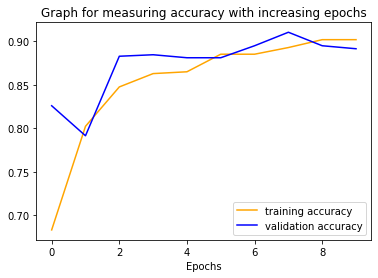

In [ ]:
plot_curves(history_3)

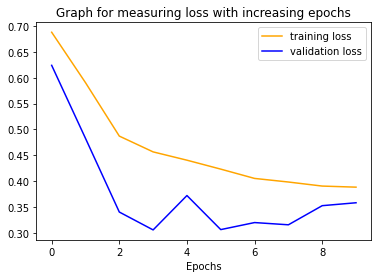

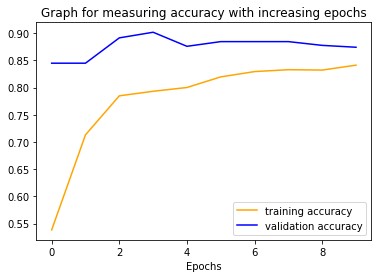

In [ ]:
plot_curves(history_4)

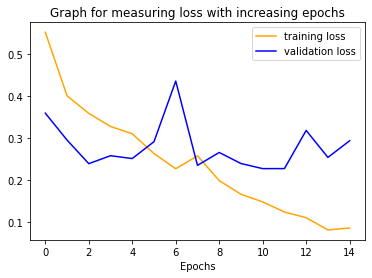

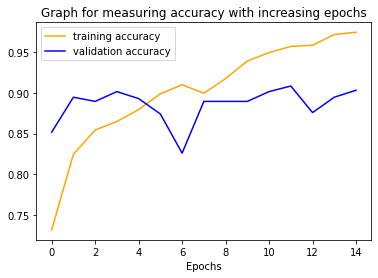

In [ ]:
plot_curves(history_5)

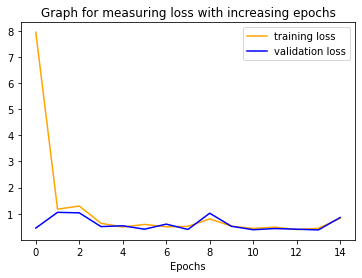

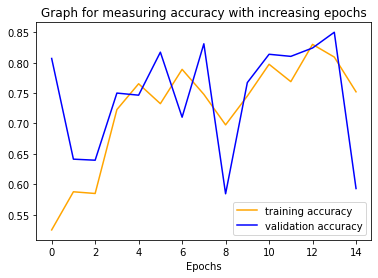

In [ ]:
plot_curves(history_6)

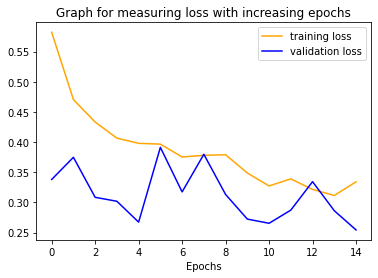

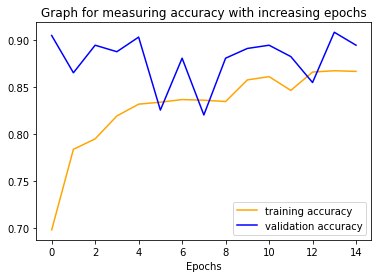

In [ ]:
plot_curves(history_7)